# DATA PREPROCESSEING AND EDA:

## 1.Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Data

In [2]:
df = pd.read_csv("../Data/raw/synthetic_data.csv")
df.head()

,soil_pH,soil_moisture,soil_temp,nitrogen,rainfall,humidity,air_temp,wind,crop_disease_risk
0,7.448884,0.274169,22.914192,62.640298,69.143970,58.672450,26.789323,8.097142,Moderate
1,6.515880,0.456054,26.919262,82.727147,126.610387,72.790299,38.339891,11.886026,High
2,6.304121,0.176207,24.038439,36.776795,74.343170,65.213161,22.994933,3.705139,Low
3,6.107007,0.139516,20.759546,47.215625,45.382673,64.532607,15.984183,7.078756,Low
4,7.126142,0.462904,29.610309,70.819888,114.952458,71.392708,32.017168,15.499967,High


## 3. Basic Inspection of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   soil_pH            999 non-null    float64
 1   soil_moisture      999 non-null    float64
 2   soil_temp          999 non-null    float64
 3   nitrogen           999 non-null    float64
 4   rainfall           999 non-null    float64
 5   humidity           999 non-null    float64
 6   air_temp           999 non-null    float64
 7   wind               999 non-null    float64
 8   crop_disease_risk  999 non-null    object 
dtypes: float64(8), object(1)
memory usage: 70.4+ KB


In [4]:
df["crop_disease_risk"].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

In [5]:
# Manual label encoding of Target column
cat_to_code = {
    "Low" : 0,
    "Moderate" : 1,
    "High" : 2
}

df["crop_disease_risk_code"] = df["crop_disease_risk"].map(cat_to_code)

In [6]:
df.describe()

,soil_pH,soil_moisture,soil_temp,nitrogen,rainfall,humidity,air_temp,wind,crop_disease_risk_code
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,6.497398,0.347514,24.244396,54.835059,101.128211,64.872207,24.947621,10.081622,1.000000
std,0.500046,0.108488,4.101221,15.506257,45.540641,15.721446,5.083439,5.102972,0.816906
min,4.990244,0.056090,13.450637,10.596114,-3.019396,21.037446,10.276198,-3.764051,0.000000
25%,6.163506,0.271903,21.115384,43.302831,61.947536,53.105354,21.037197,6.403673,0.000000
50%,6.500264,0.345399,24.513257,54.934660,102.797745,65.025533,24.846984,10.239404,1.000000
75%,6.828555,0.422130,27.242969,66.626360,138.044966,76.266874,28.735233,13.882926,2.000000
max,7.967829,0.675946,35.357621,105.290552,211.965989,105.605030,38.781810,24.353043,2.000000


In [7]:
print(f"Null values in the data : {df.isnull().sum().sum()}")
print(f"Duplicated values in the data : {df.duplicated().sum()}")

Null values in the data : 0
Duplicated values in the data : 0


## 4. EDA(Visiualizations)

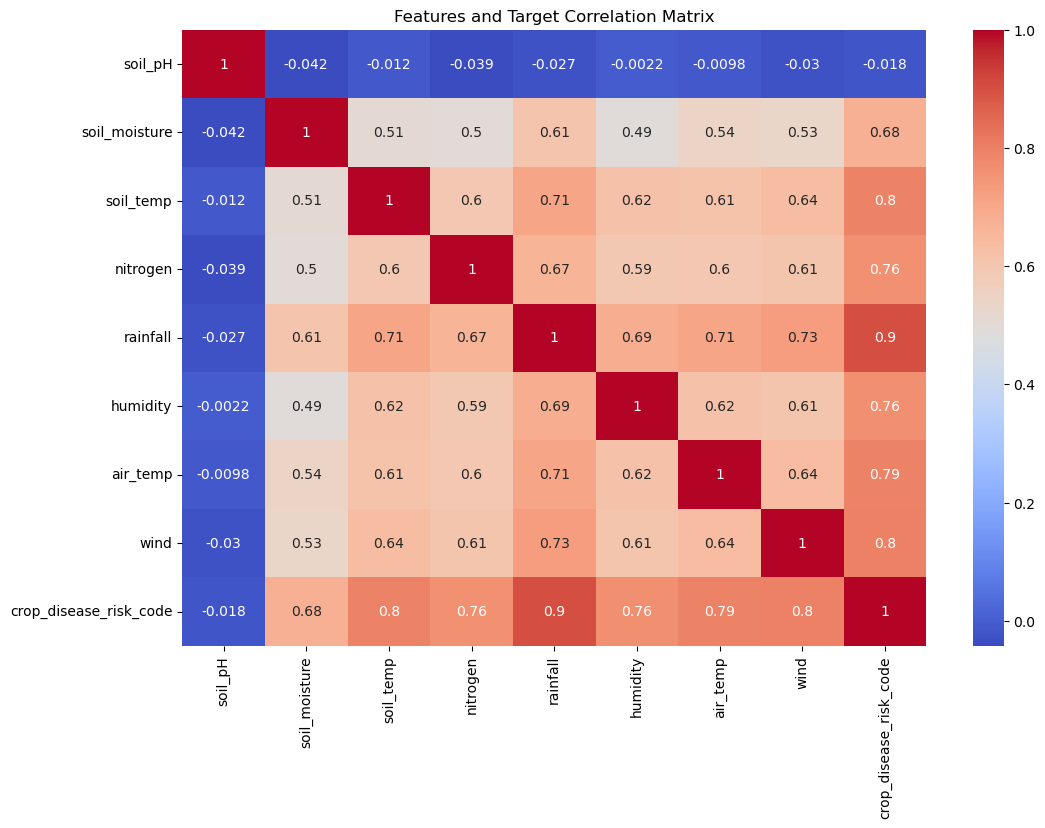

In [8]:
###############
#Correlation matrix 
###############

corr = df.corr(numeric_only= True)
plt.figure(figsize=(12,8))
sns.heatmap(corr , annot = True , cmap = "coolwarm")
plt.title("Features and Target Correlation Matrix")
plt.show()


In [9]:
#############
#Histogram and Box plot of features to check the distribution of the data and outliers
#############

def plot_columns(df):
    for col in df.columns:
        plt.figure(figsize=(12,4))
        if df[col].dtype in ['int64','float64']:
            plt.subplot(1,2,1)
            sns.histplot(df[col], kde=True)
            plt.title(f"Distribution of {col}")
            
            plt.subplot(1,2,2)
            sns.boxplot(x=df[col] )
            plt.title(f"Boxplot of {col}")
        
        else:
            sns.countplot(x=df[col] , hue=df["crop_disease_risk"])
            plt.title(f"Countplot of {col}")
        
        plt.tight_layout()
        plt.show()


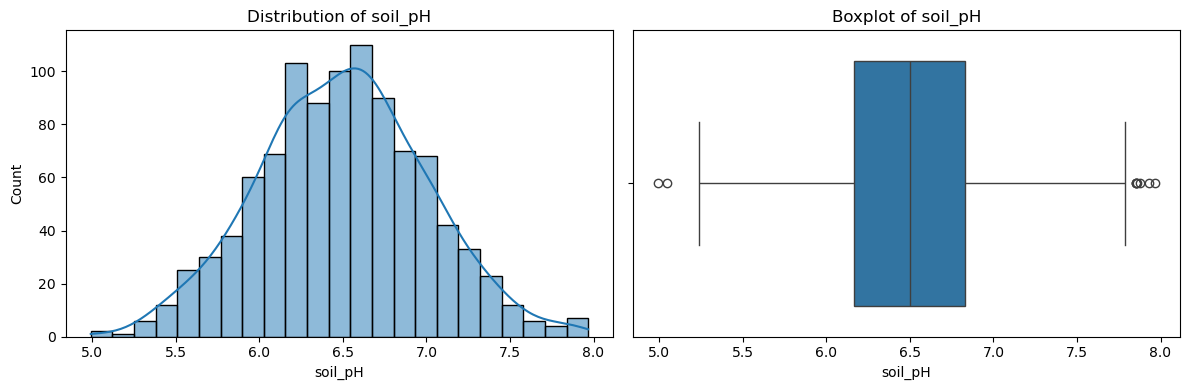

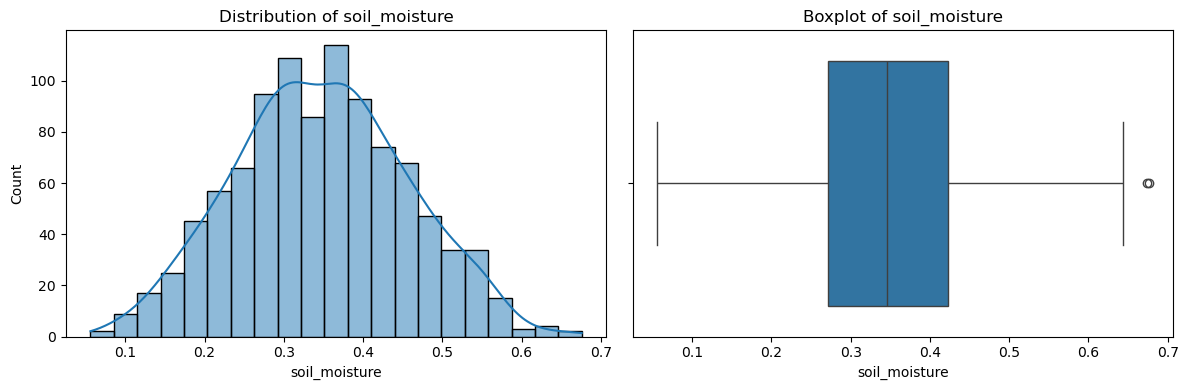

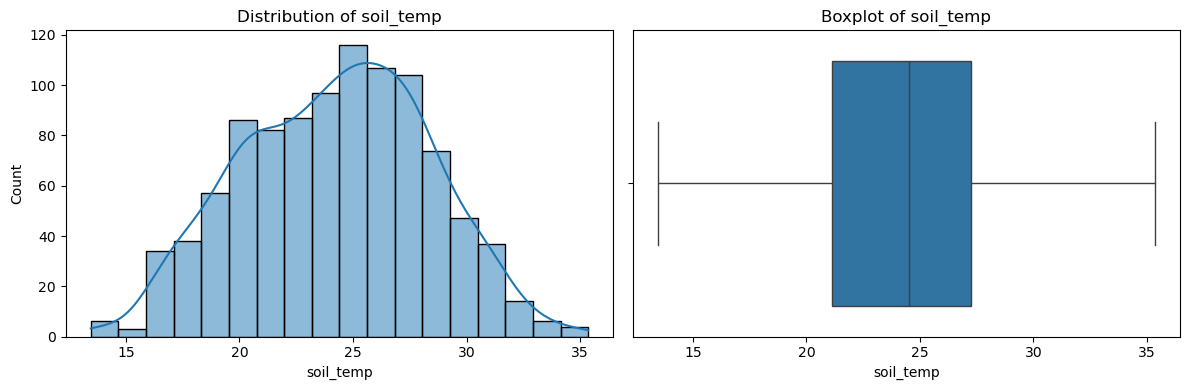

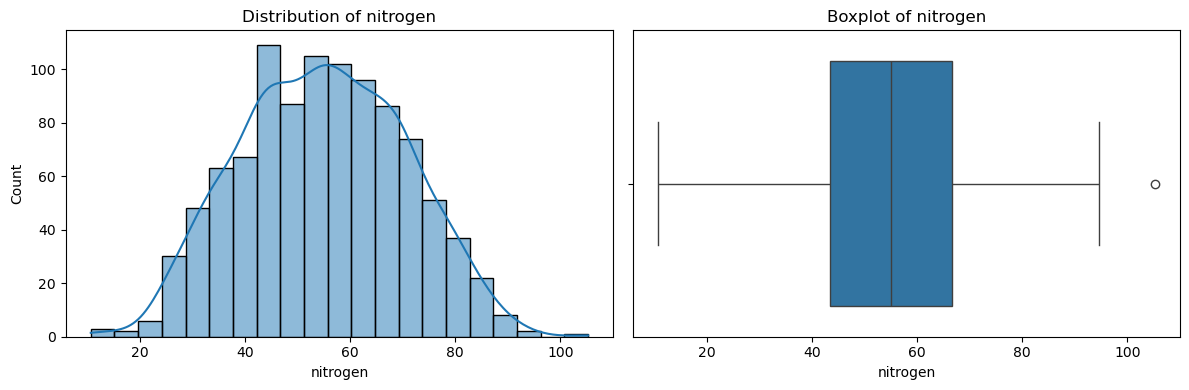

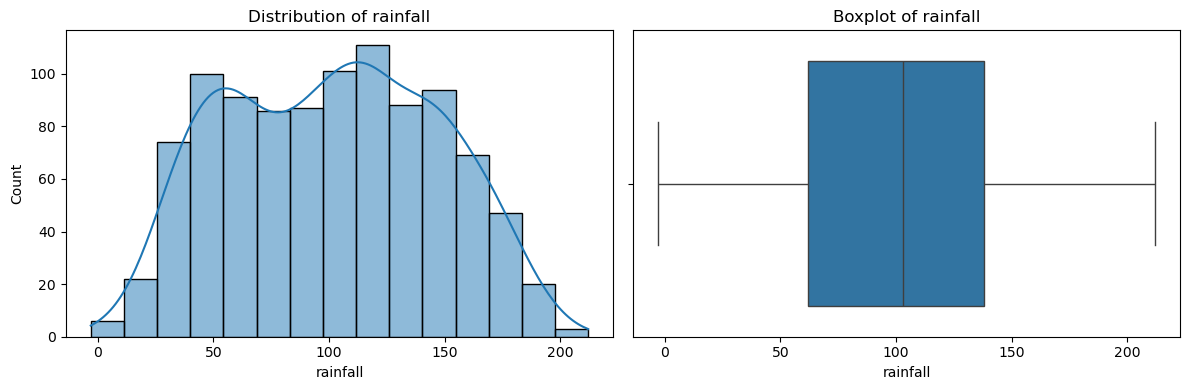

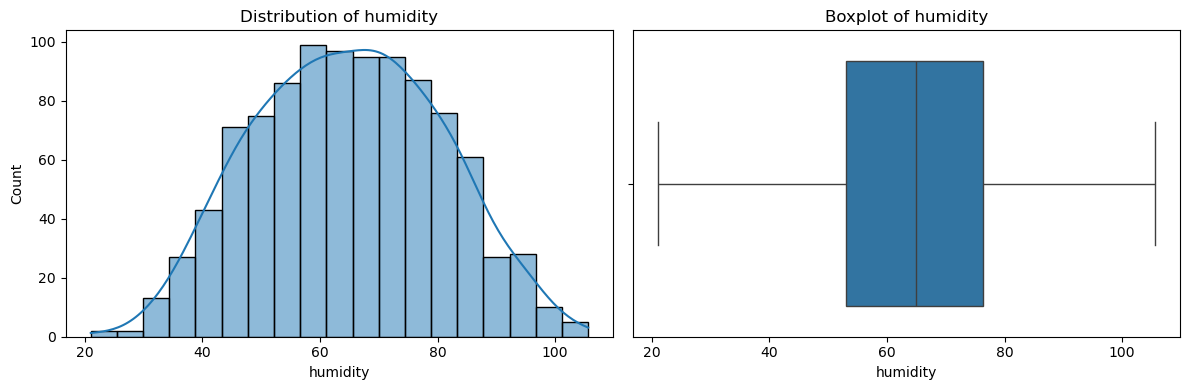

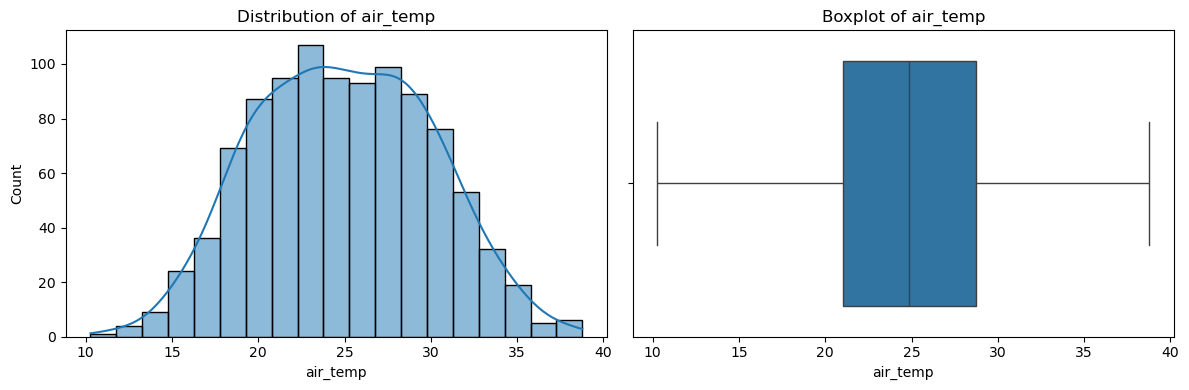

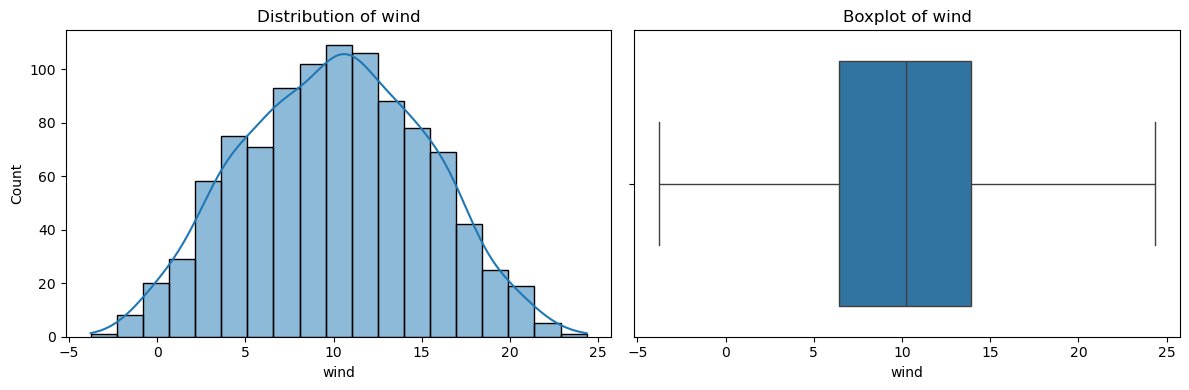

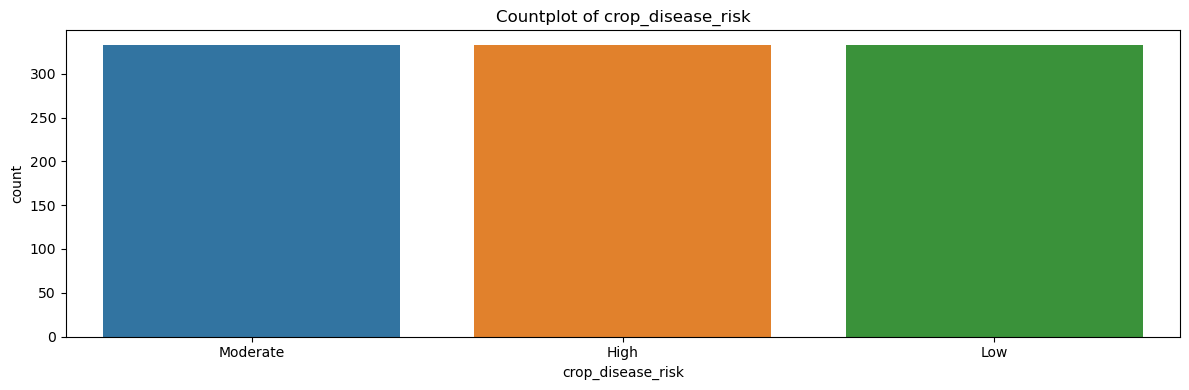

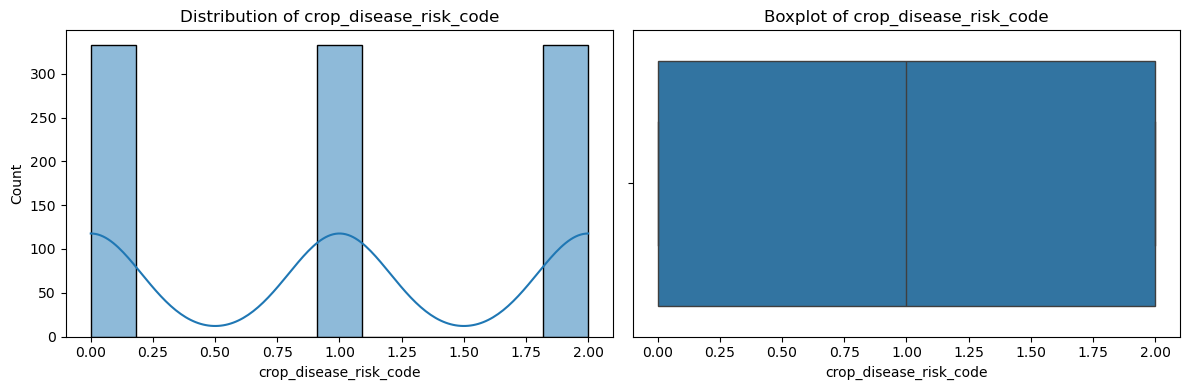

In [10]:
# calling the above function for the our dataframe columns 

plot_columns(df)

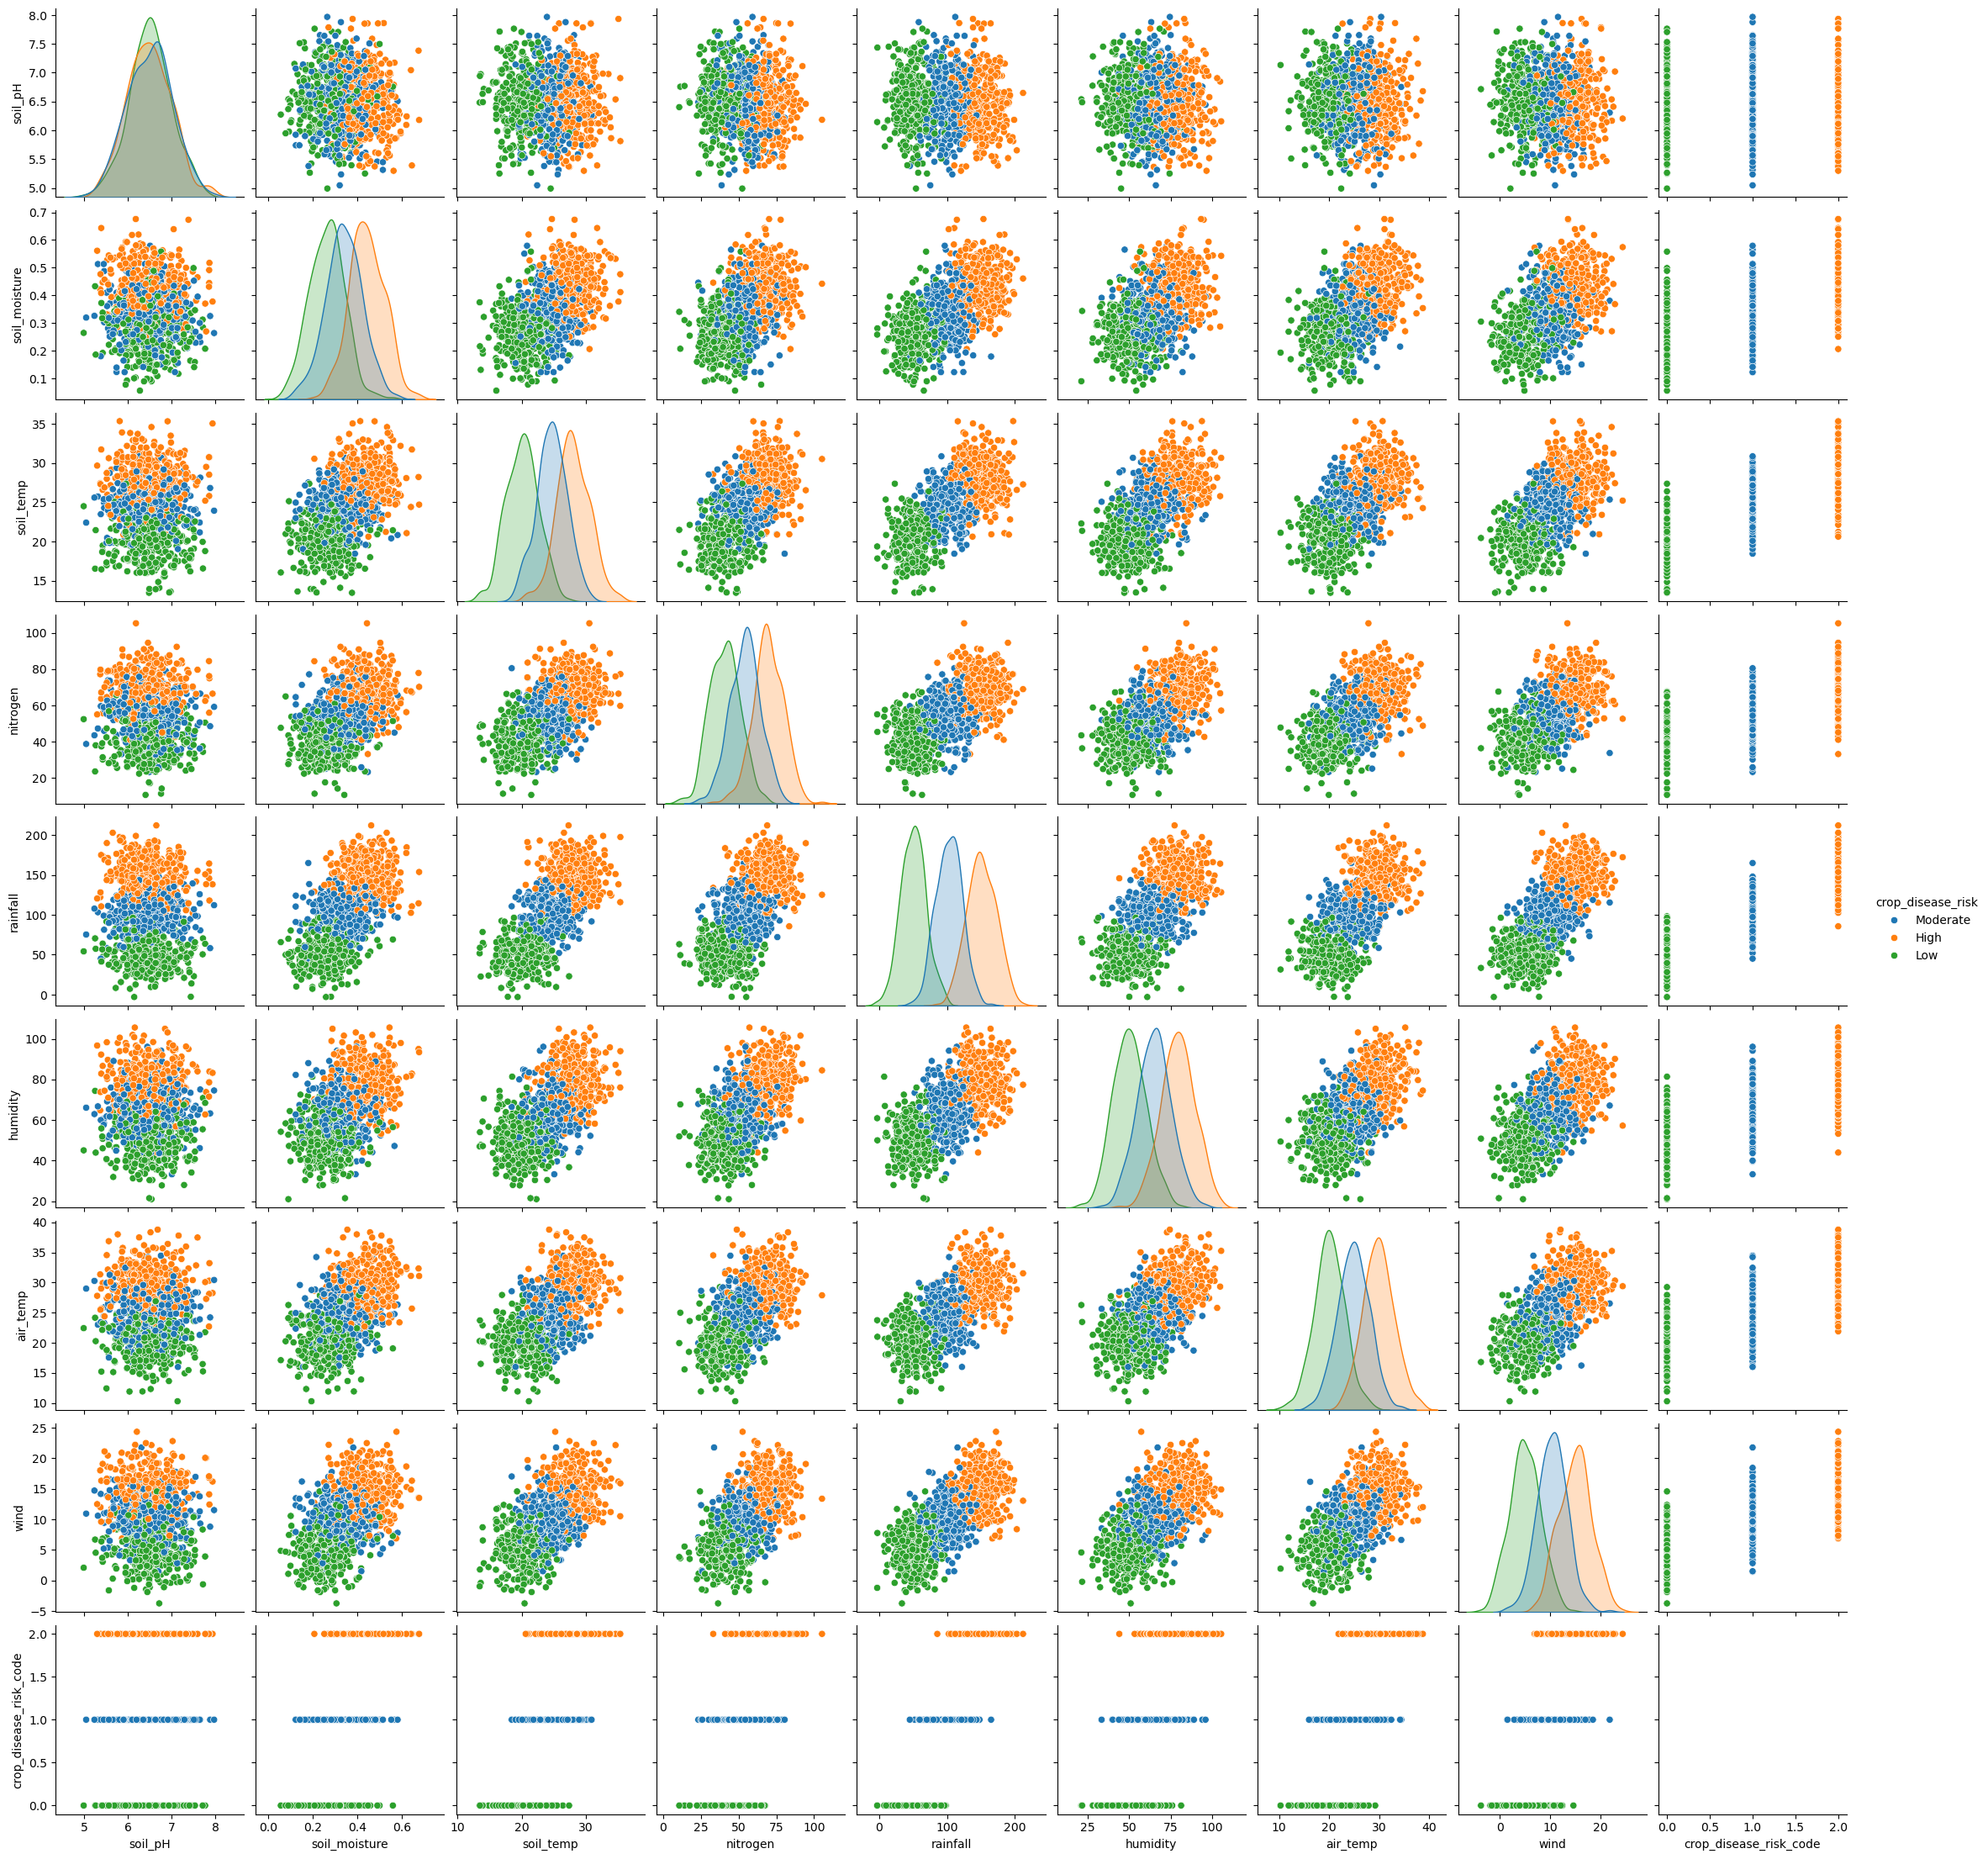

In [11]:
#####################
#pair plot 
####################
def plot_pairplot(df, hue=None):
    sns.pairplot(df, hue=hue, diag_kind="kde")
    plt.show()
    
    
plot_pairplot(df , hue="crop_disease_risk")

In [12]:

df.to_csv("../Data/processed/processed_farming_data.csv" , index= False)


In [13]:
print(df.columns)

Index(['soil_pH', 'soil_moisture', 'soil_temp', 'nitrogen', 'rainfall',
       'humidity', 'air_temp', 'wind', 'crop_disease_risk',
       'crop_disease_risk_code'],
      dtype='object')


In [14]:
# Get min and max for each feature
feature_ranges = df.describe().loc[["min", "max"]]

print("\nFeature ranges (min and max values):\n")
feature_ranges


Feature ranges (min and max values):



,soil_pH,soil_moisture,soil_temp,nitrogen,rainfall,humidity,air_temp,wind,crop_disease_risk_code
min,4.990244,0.056090,13.450637,10.596114,-3.019396,21.037446,10.276198,-3.764051,0.0
max,7.967829,0.675946,35.357621,105.290552,211.965989,105.605030,38.781810,24.353043,2.0
